In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy.stats as stats
from tqdm import tqdm
import math
from termcolor import cprint

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [2]:
DATA_DIR = '/Users/andishetavakkoli/Documents/notebook/github_project/machine-learning-projects-data/credit_score'

In [3]:
df_train = pd.read_csv(DATA_DIR +'/train.csv')
df_test = pd.read_csv(DATA_DIR +'/test.csv')

In [4]:
df_train.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.94496,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


# Cncate train and test df

In [5]:
df_train.shape

(100000, 28)

In [6]:
df_train.describe(include='object')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


In [7]:
df_train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [8]:
df = pd.concat([df_train, df_test], ignore_index=True)

<AxesSubplot:>

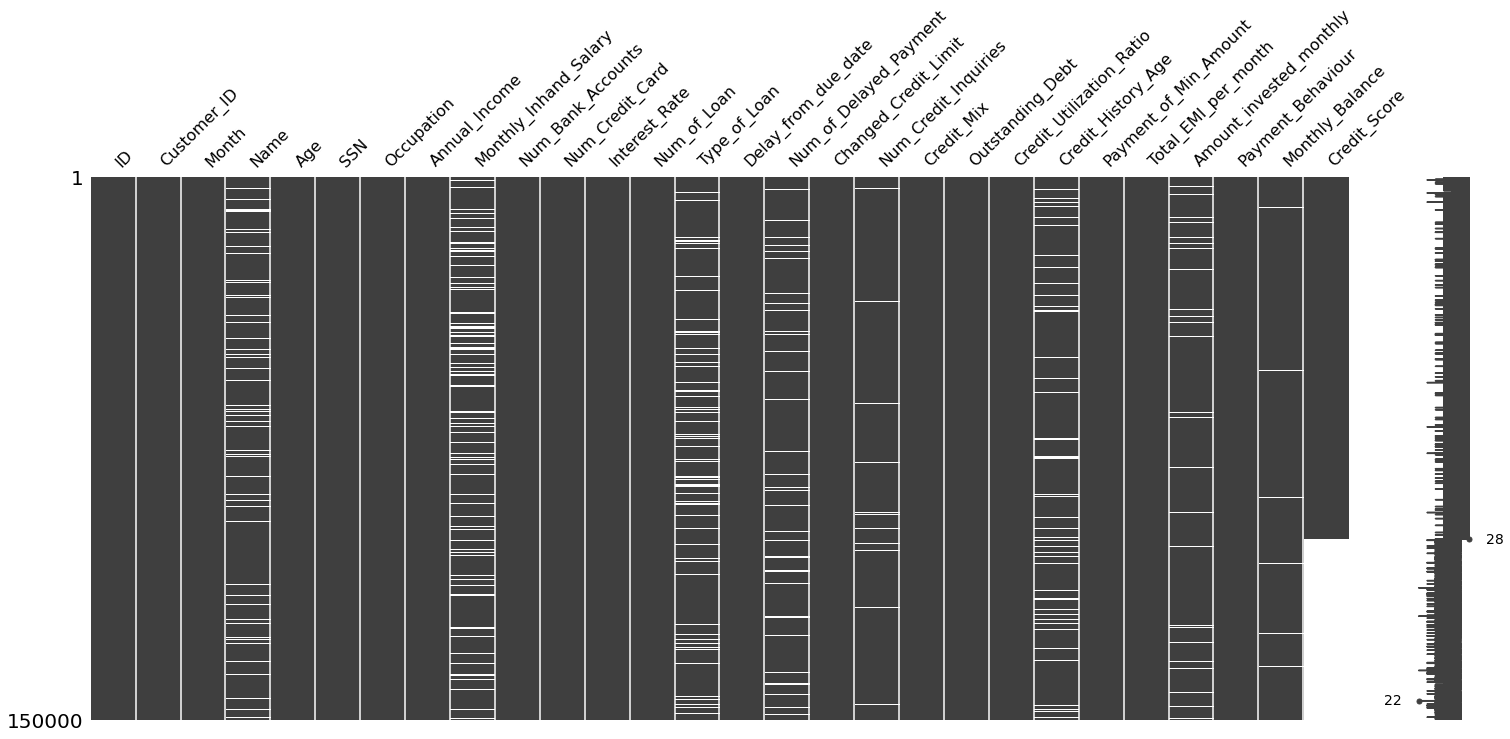

In [9]:
msno.matrix(df)

In [10]:
for col in df.columns:
    print(f'column name: {col}')
    print(df[col].value_counts(dropna=False))
    print('*'* 50)

column name: ID
0x1602     1
0x162e     1
0x25fea    1
0x25feb    1
0x25fec    1
          ..
0x13afa    1
0x13afb    1
0x13afc    1
0x13afd    1
0x25ff1    1
Name: ID, Length: 150000, dtype: int64
**************************************************
column name: Customer_ID
CUS_0xd40     12
CUS_0x9bf4    12
CUS_0x5ae3    12
CUS_0xbe9a    12
CUS_0x4874    12
              ..
CUS_0x2eb4    12
CUS_0x7863    12
CUS_0x9d89    12
CUS_0xc045    12
CUS_0x942c    12
Name: Customer_ID, Length: 12500, dtype: int64
**************************************************
column name: Month
January      12500
February     12500
March        12500
April        12500
May          12500
June         12500
July         12500
August       12500
September    12500
October      12500
November     12500
December     12500
Name: Month, dtype: int64
**************************************************
column name: Name
NaN                    15000
Stevex                    66
Langep                    65
Jessicad    

NaN                   6750
__10000__             6480
0.0                    275
80.41529543900253        1
16.53218878920387        1
                      ... 
209.17274569312266       1
333.0148085469461        1
274.68712877851107       1
220.58121173366908       1
220.45787812168732       1
Name: Amount_invested_monthly, Length: 136498, dtype: int64
**************************************************
column name: Payment_Behaviour
Low_spent_Small_value_payments      38207
High_spent_Medium_value_payments    26462
Low_spent_Medium_value_payments     20698
High_spent_Large_value_payments     20565
High_spent_Small_value_payments     16991
Low_spent_Large_value_payments      15677
!@9#%8                              11400
Name: Payment_Behaviour, dtype: int64
**************************************************
column name: Monthly_Balance
NaN                                 1762
__-333333333333333333333333333__      15
600.1125089726384                      1
120.54247208897846        

# Correct Data Type

### Month

In [11]:
df['Month'] = pd.to_datetime(df['Month'], format='%B').dt.month

In [12]:
# for item in df['Customer_ID']:
#     if len(item)< 5:
#         print(item)

### Name

In [13]:
# df['Name'] = df['Name'].fillna('Unknown')

### Age

In [14]:
df['Age'] = df['Age'].str.replace('_', '').replace('-', '').replace("-", "")

In [15]:
df['Age'].replace('-500', np.nan, inplace=True)

In [16]:
df['Age'] = df['Age'].astype('float')

In [17]:
# [item for item in df['Age'] if not item.isdigit()]

### SSN

In [18]:
df['SSN'] = df['SSN'].replace('#F%$D@*&8', np.nan)

In [19]:
for item in df['SSN']:
    
    if isinstance(item, str):
    
        if re.findall(r'\b\d{3}-\d{2}-\d{4}\b', item) == False:
            print(item)
    

### Occupation

In [20]:
df['Occupation'] = df['Occupation'].replace('_______', np.nan)
df['Occupation'] = df['Occupation'].astype('category')

### Annual_Income

In [21]:
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '')

In [22]:
df['Annual_Income'] = df['Annual_Income'].astype('float')

### Num_of_Loan

In [23]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '')

In [24]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype('int')

###  Type of Loan

In [25]:
# df['Type_of_Loan'] = df['Type_of_Loan'].astype('category')

### Num of Delayed Payment

In [26]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype('float')

### Changed Credit Limit

In [27]:
df['Changed_Credit_Limit'].replace('_', np.nan, inplace=True)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype('float')

### Credit Mix

In [28]:
df['Credit_Mix'] = df['Credit_Mix'].str.replace('_', 'unknown')
df['Credit_Mix'] = df['Credit_Mix'].astype('category')

### Outstanding Debt

In [29]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype('float')

### Credit History Age

In [30]:
df['Credit_History_Age'] = df['Credit_History_Age'].astype('category')

In [31]:
def split_year_month(date, is_month=None):
    date = date.replace('Years', '').replace('Months', '')
    date_list = date.split('and')
    
    if is_month:
        return int(date_list[1].strip())
    
    return int(date_list[0].strip())
    

In [32]:
# df['Credit_History_Age_Month'] = df['Credit_History_Age'].apply(lambda x: split_year_month(x, is_month=True))

In [33]:
# df['Credit_History_Age_Year'] = df['Credit_History_Age'].apply(lambda x: split_year_month(x))

### Payment of Min Amount

In [34]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].astype('category')

### Amount invested monthly

In [35]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('__10000__', '10000')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype('float')

### Payment Behaviour

In [36]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype('category')

### Monthly Balance

In [37]:
df['Monthly_Balance'] = df['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan)
df['Monthly_Balance'] = df['Monthly_Balance'].astype('float')

### Credit Score

In [38]:
df['Credit_Score'] = df['Credit_Score'].astype('category')

In [59]:
df.describe().T.style.background_gradient(subset = ['mean','min','50%','max'],cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Month,150000.000000,6.500000,3.452064,1.000000,3.750000,6.500000,9.250000,12.000000
Age,150000.000000,33.479060,10.767158,14.000000,25.000000,33.000000,42.000000,56.000000
Annual_Income,150000.000000,50505.123449,38299.358260,7005.930000,19342.972500,36999.705000,71683.470000,179987.280000
Monthly_Inhand_Salary,150000.000000,4192.525296,3182.728812,303.645417,1625.558333,3091.000000,5951.373333,15204.633333
Num_Bank_Accounts,150000.000000,5.368707,2.594388,-1.000000,3.000000,5.000000,7.000000,11.000000
Num_Credit_Card,150000.000000,5.533660,2.068672,0.000000,4.000000,5.000000,7.000000,11.000000
Interest_Rate,150000.000000,14.532080,8.741316,1.000000,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,150000.000000,3.532880,2.446352,0.000000,2.000000,3.000000,5.000000,9.000000
Delay_from_due_date,150000.000000,21.070393,14.813531,-1.000000,10.000000,18.000000,28.000000,62.000000
Num_of_Delayed_Payment,150000.000000,13.301967,6.263060,-2.000000,9.000000,14.000000,18.000000,25.000000


# Data Cleaning 

### Age

In [40]:
df[df['Age'] > 100].shape

(2827, 28)

<AxesSubplot:xlabel='Age', ylabel='Density'>

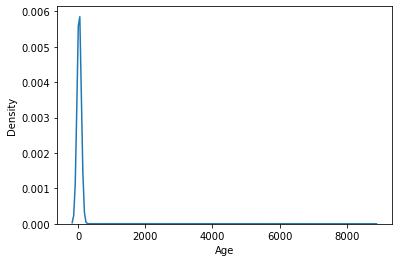

In [41]:
sns.kdeplot(df,x='Age')

In [42]:
def handel_outlier_numerical(df, groupby_col, col, inplace=True):
    """
    This function handel the outliers in two steps:
    1. find min and max in one column
    2. impute outliers with NaNs
    3. fill NaNs with mode    
    """
    col_min , col_max = df.groupby(groupby_col)[col] \
    .apply(list).apply(lambda x: stats.mode(x)[0][0]) \
    .apply([min, max])
    
    df[col] = np.where((df[col] > col_max) | (df[col] < col_min),  np.nan, df[col])
    col_mode_group = df.groupby(groupby_col)[col].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    df[col].fillna(col_mode_group, inplace=inplace)
        

In [43]:
def handel_outlier_categorical(df, groupby_col, col, inplace=True):
    col_mode_group = df.groupby(groupby_col)[col].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    df[col].fillna(col_mode_group, inplace=inplace)

In [45]:
cat_features = df.drop(columns=['Credit_Score','ID', 'Customer_ID']).select_dtypes(exclude='number').columns

In [46]:
num_features = df.drop(columns='Month').select_dtypes(include='number').columns

In [47]:
for feature in tqdm(cat_features):
    handel_outlier_categorical(df, 'Customer_ID', feature, inplace=True)
    

100%|████████████████████████████████████████████████████████████████████████████| 8/8 [01:32<00:00, 11.61s/it]


In [48]:
for feature in tqdm(num_features):
    handel_outlier_numerical(df, 'Customer_ID', feature, inplace=True)

100%|██████████████████████████████████████████████████████████████████████████| 16/16 [03:48<00:00, 14.30s/it]


In [49]:
handel_outlier_categorical(df, 'Customer_ID', 'SSN', inplace=True)

In [50]:
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: x.lower().replace('and ', '').replace(', ', ',').strip() if pd.notna(x) else x)

In [51]:
df['Type_of_Loan'].fillna('No Data', inplace=True)

In [52]:
df['Type_of_Loan'].value_counts(dropna=False)

No Data                                                                                                                     17112
not specified                                                                                                                2112
credit-builder loan                                                                                                          1920
personal loan                                                                                                                1908
debt consolidation loan                                                                                                      1896
                                                                                                                            ...  
not specified,mortgage loan,auto loan,payday loan                                                                              12
payday loan,mortgage loan,debt consolidation loan,student loan                            

In [53]:
for col in df.columns:
    print(f'column name: {col}')
    print(df[col].value_counts(dropna=False))
    print('*'* 50)

column name: ID
0x1602     1
0x162e     1
0x25fea    1
0x25feb    1
0x25fec    1
          ..
0x13afa    1
0x13afb    1
0x13afc    1
0x13afd    1
0x25ff1    1
Name: ID, Length: 150000, dtype: int64
**************************************************
column name: Customer_ID
CUS_0xd40     12
CUS_0x9bf4    12
CUS_0x5ae3    12
CUS_0xbe9a    12
CUS_0x4874    12
              ..
CUS_0x2eb4    12
CUS_0x7863    12
CUS_0x9d89    12
CUS_0xc045    12
CUS_0x942c    12
Name: Customer_ID, Length: 12500, dtype: int64
**************************************************
column name: Month
1     12500
2     12500
3     12500
4     12500
5     12500
6     12500
7     12500
8     12500
9     12500
10    12500
11    12500
12    12500
Name: Month, dtype: int64
**************************************************
column name: Name
Langep                72
Jessicad              72
Stevex                72
Huwk                  60
Jonathan Stempelr     60
                      ..
Harro Teni            12
Breidtha

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        150000 non-null  object  
 1   Customer_ID               150000 non-null  object  
 2   Month                     150000 non-null  int64   
 3   Name                      150000 non-null  object  
 4   Age                       150000 non-null  float64 
 5   SSN                       150000 non-null  object  
 6   Occupation                150000 non-null  category
 7   Annual_Income             150000 non-null  float64 
 8   Monthly_Inhand_Salary     150000 non-null  float64 
 9   Num_Bank_Accounts         150000 non-null  float64 
 10  Num_Credit_Card           150000 non-null  float64 
 11  Interest_Rate             150000 non-null  float64 
 12  Num_of_Loan               150000 non-null  float64 
 13  Type_of_Loan              150

# Visualization

In [55]:
def plot_distributions(data, color='blue'):
    """
    This function takes a pandas DataFrame as input and plots the distribution of each feature
    in a single figure. The number of rows and columns in the figure is determined dynamically
    based on the number of features in the DataFrame. The "darkgrid" theme from seaborn is applied
    to the plots. You can specify a color for the bars in the histogram by passing a "color" parameter.
    """
    sns.set_theme(style='whitegrid')  # set the seaborn theme

    num_cols = 3  # set the number of columns per row
    num_features = len(data.columns)
    num_rows = math.ceil(num_features / num_cols)

    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))

    for i, column in enumerate(data.columns):
        row = i // num_cols
        col = i % num_cols
        axs[row][col].hist(data[column], bins=30, alpha=0.5, color=color)
        axs[row][col].set_title(f'Distribution of {column}')
        axs[row][col].set_xlabel(column)
        axs[row][col].set_ylabel('Frequency')
    
    fig.tight_layout(pad=2.0)
    plt.show()

In [56]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [66]:
df.select_dtypes(include='float').columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

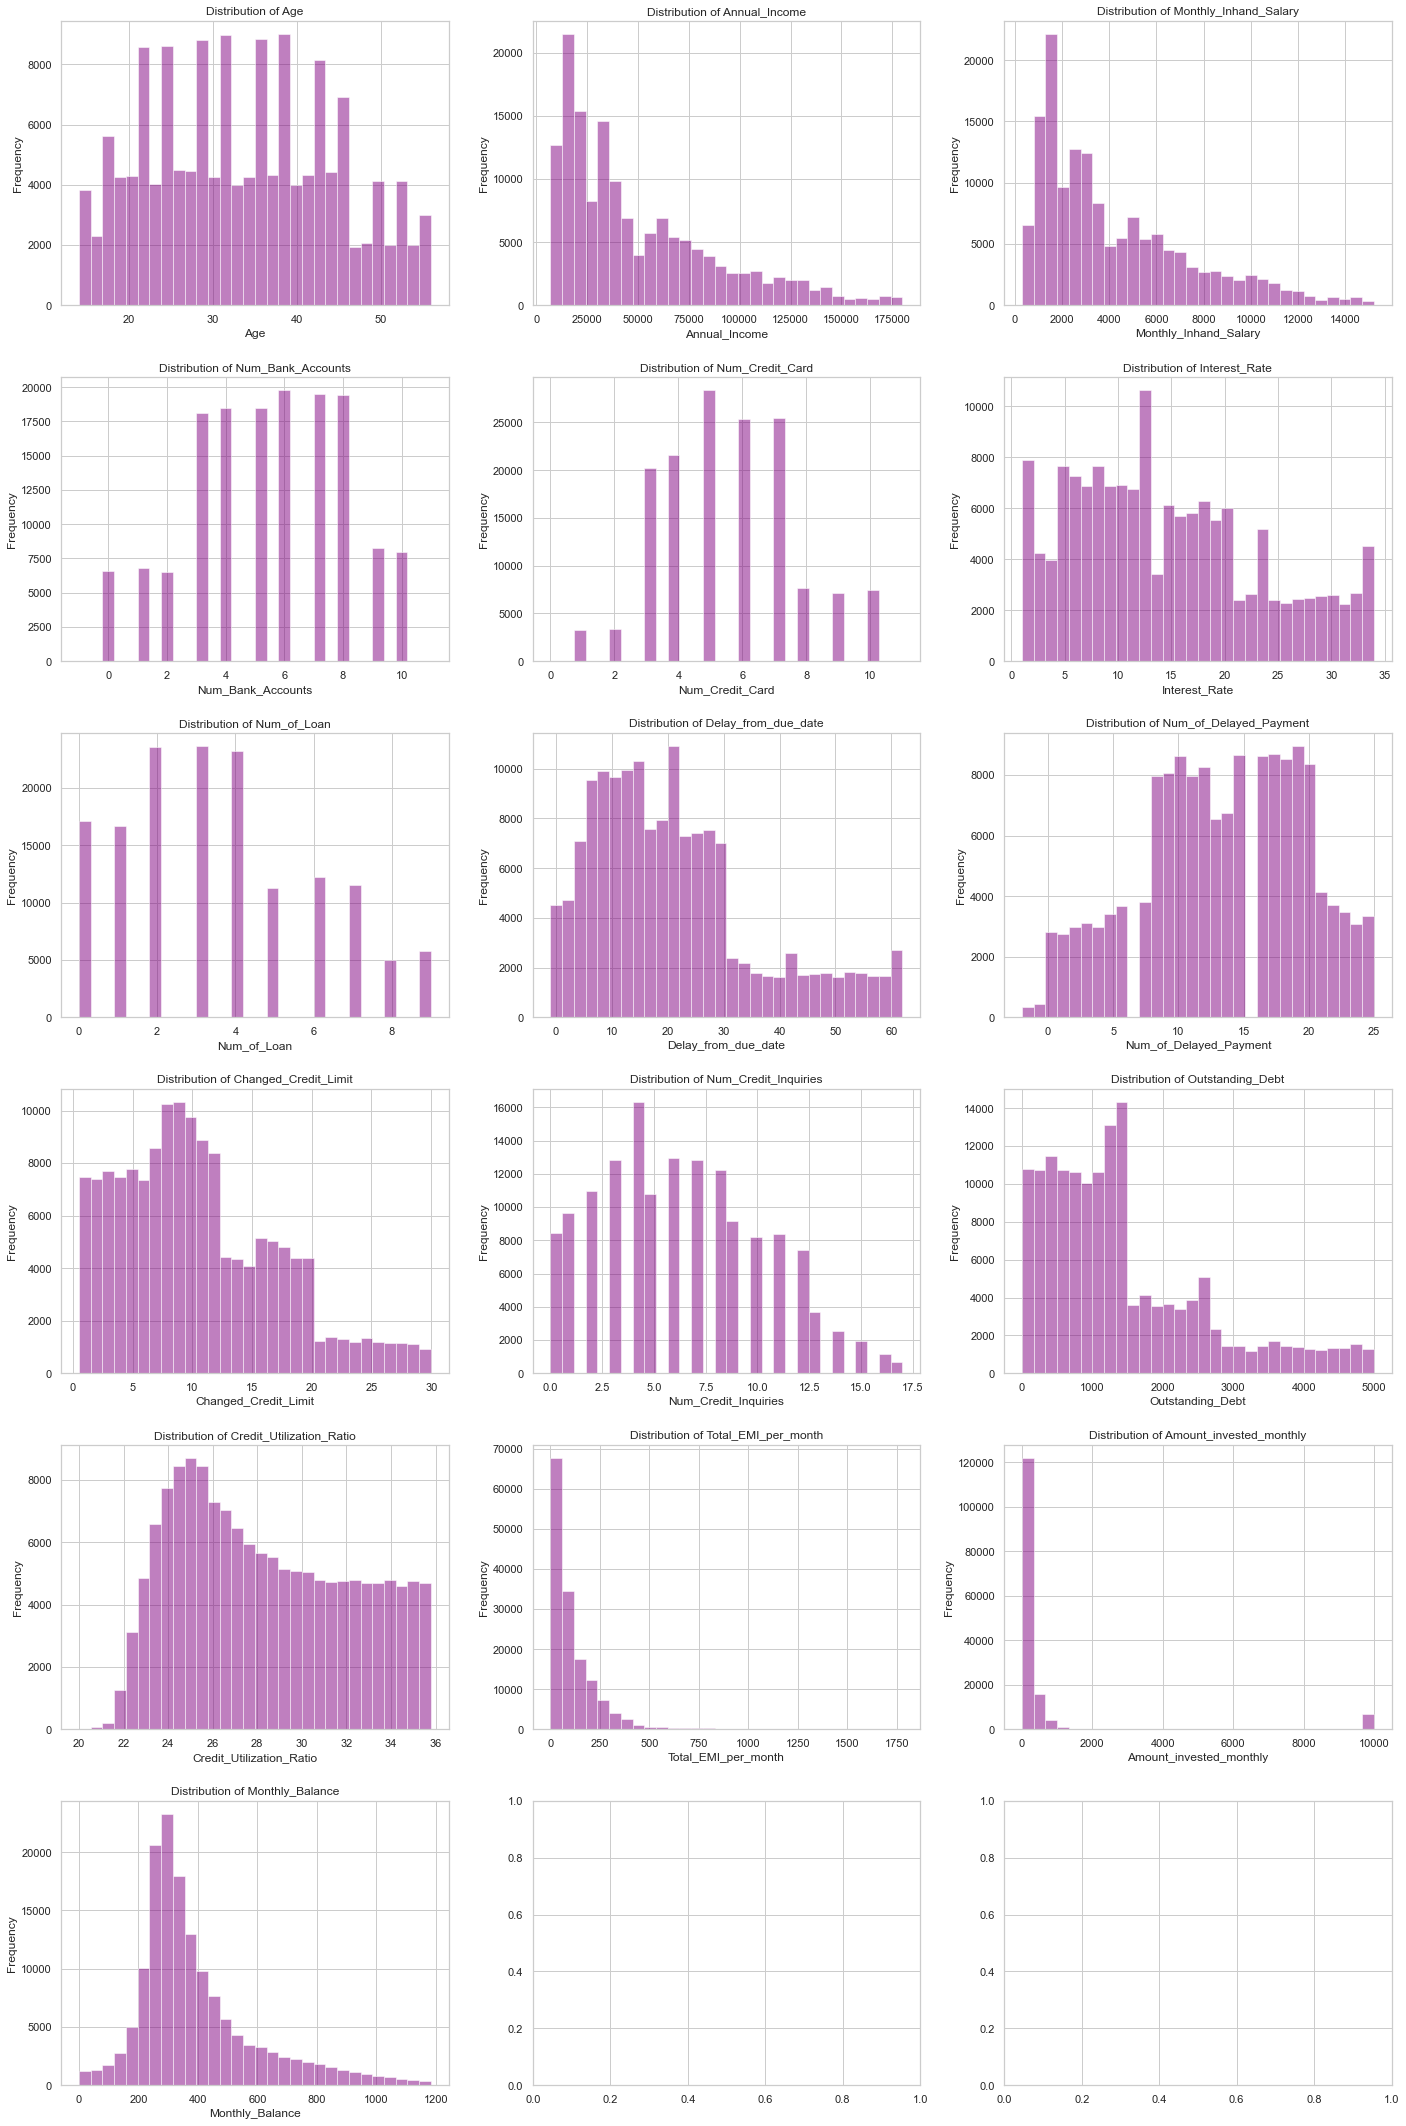

In [57]:
plot_distributions(df.select_dtypes(include='float'), color='purple')

In [106]:
'''This function detects the best z-score for outlier detection in the specified column.'''

def outlier_zscore(df, col, min_z=3, max_z = 4, step = 0.05, print_list = False):
    z_scores = stats.zscore(df[col].dropna())
    threshold_list = []
    
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
    
    df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
    df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    df_outlier['pct'] = df_outlier['pct'].apply(lambda x : x-100 if x == 100 else x)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    IQR_coef = round((best_treshold - 0.675) / 1.35, 2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    num_outlier = df_outlier.iloc[df_outlier.pct.argmax(), 1]
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), colors="r", ls = ":")
    plt.annotate("Zscore : {}\nIQR_coef : {}\nValue : {}\nNum_outlier : {}\nPercentile : {}".format(best_treshold,
                                                                          IQR_coef,
                                                                          outlier_limit,
                                                                          num_outlier,     
                                                                          (np.round(percentile_threshold, 3), 
                                                                           np.round(100-percentile_threshold, 3))),
                                                                          (best_treshold, df_outlier.outlier_count.max()/2))
    plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, IQR_coef, outlier_limit, num_outlier, percentile_threshold)

In [107]:
'''This function plots histogram, boxplot and z-score/outlier graphs for the specified column.'''

def outlier_inspect(df, col, min_z = 3, max_z = 4, step = 0.05, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z = min_z, max_z = max_z, step = step)
    plt.show()

Outlier Inspection


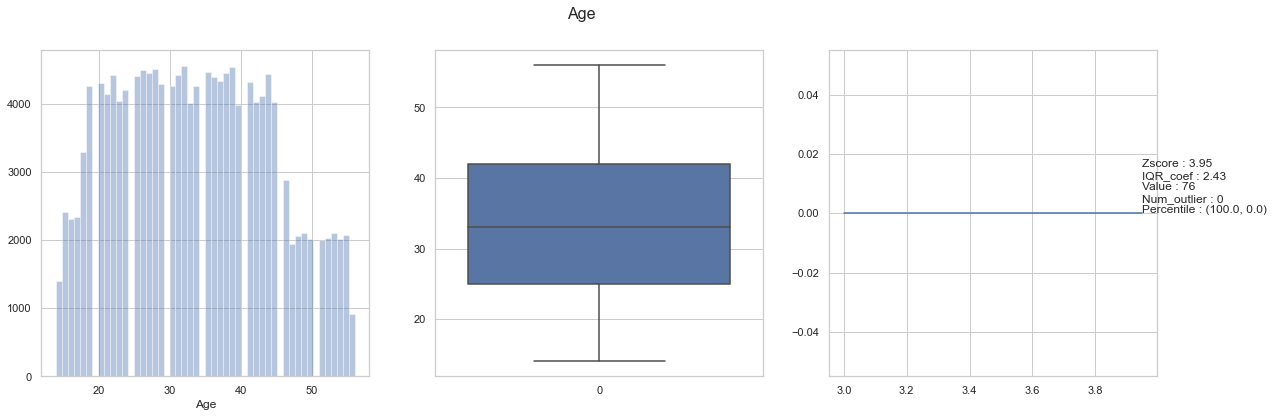

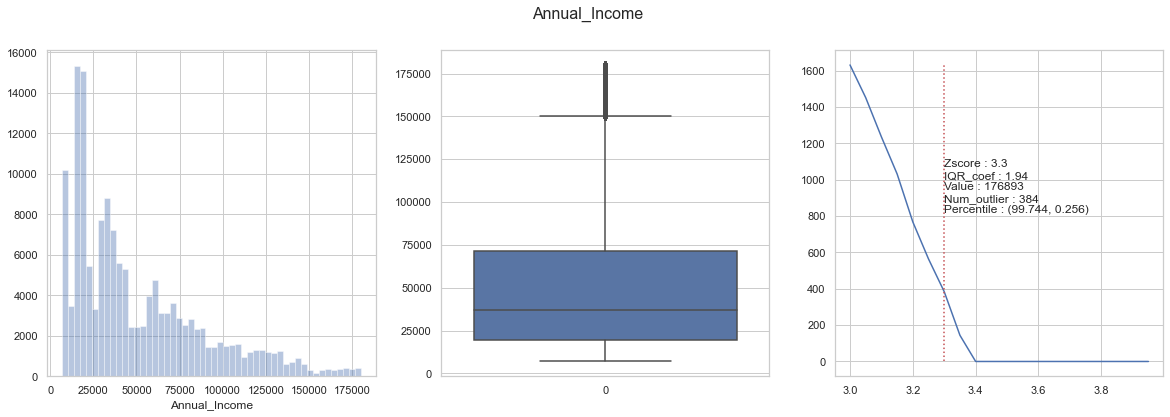

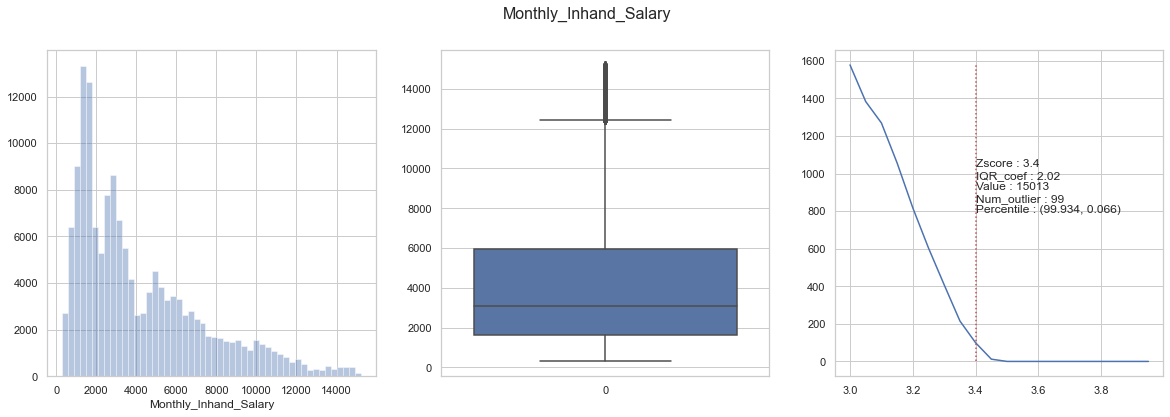

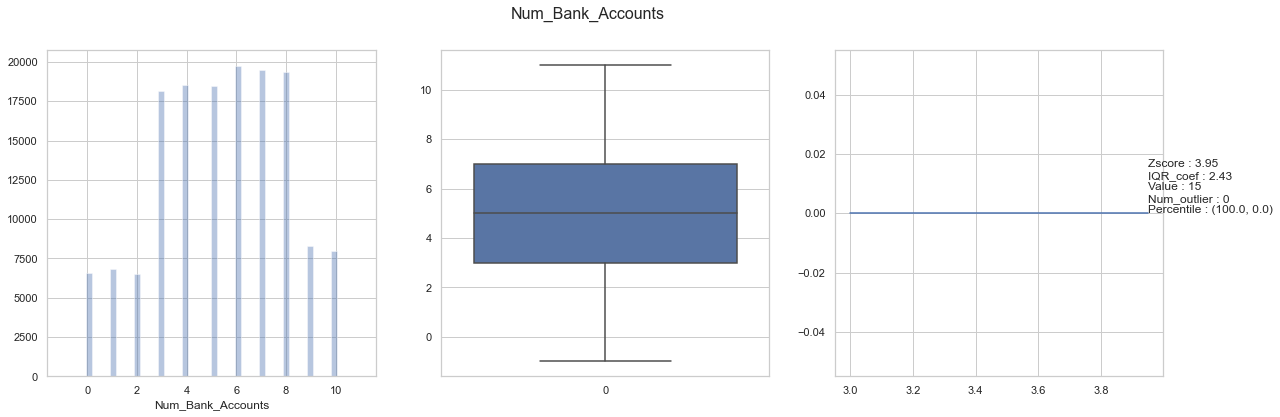

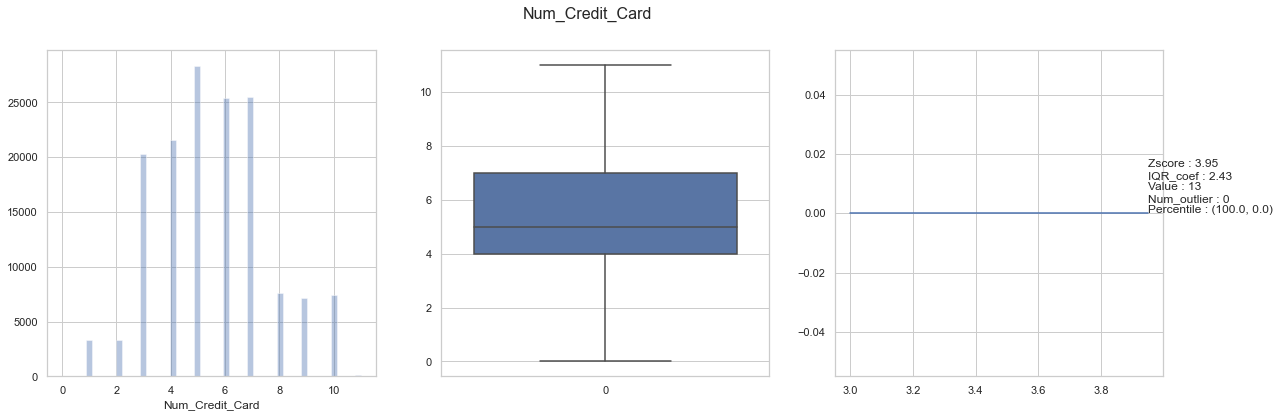

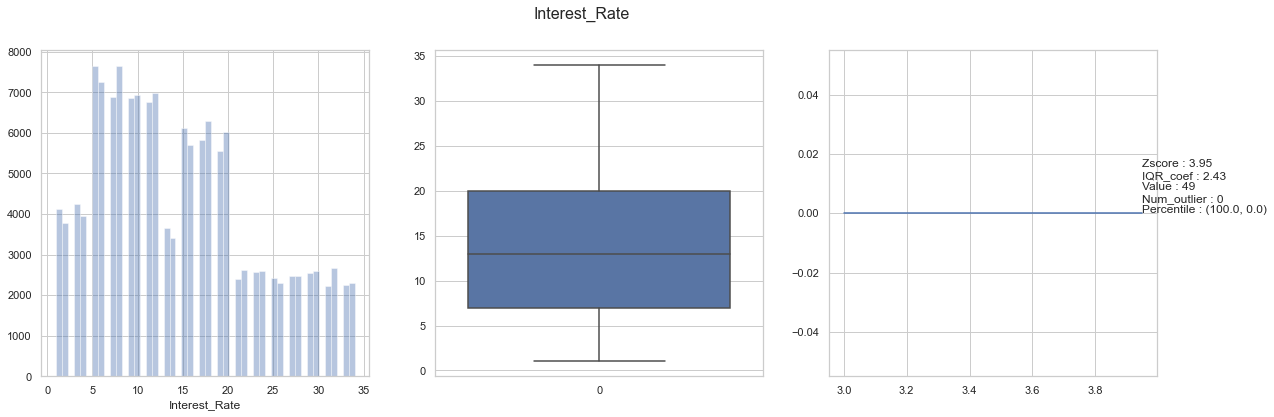

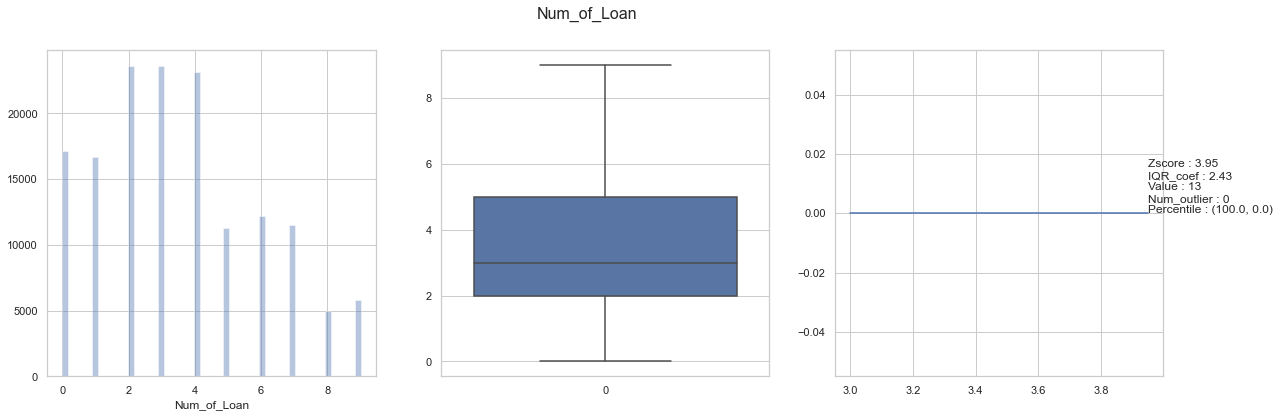

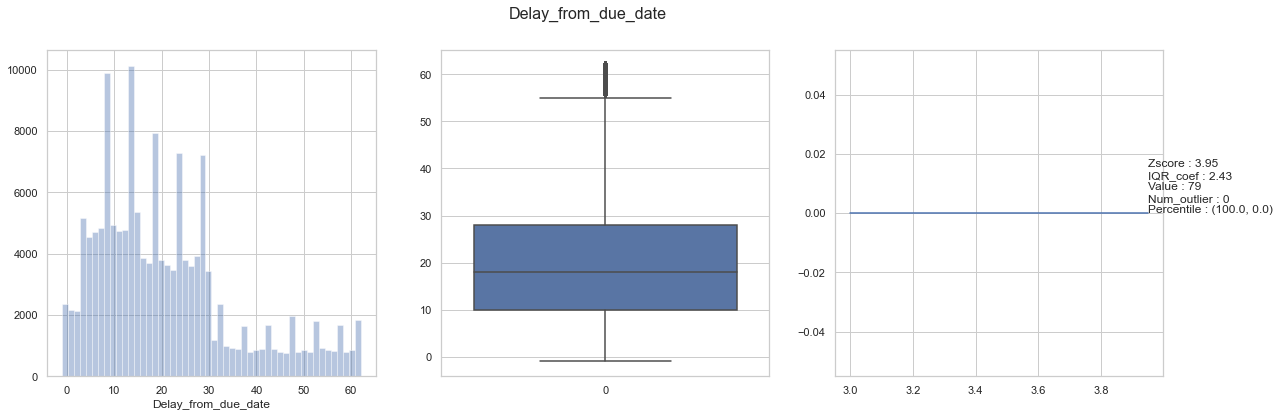

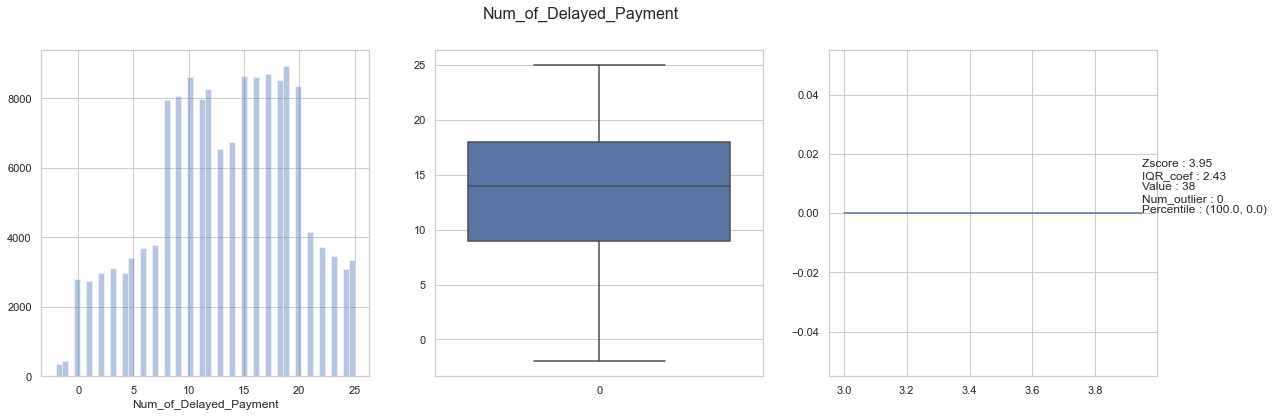

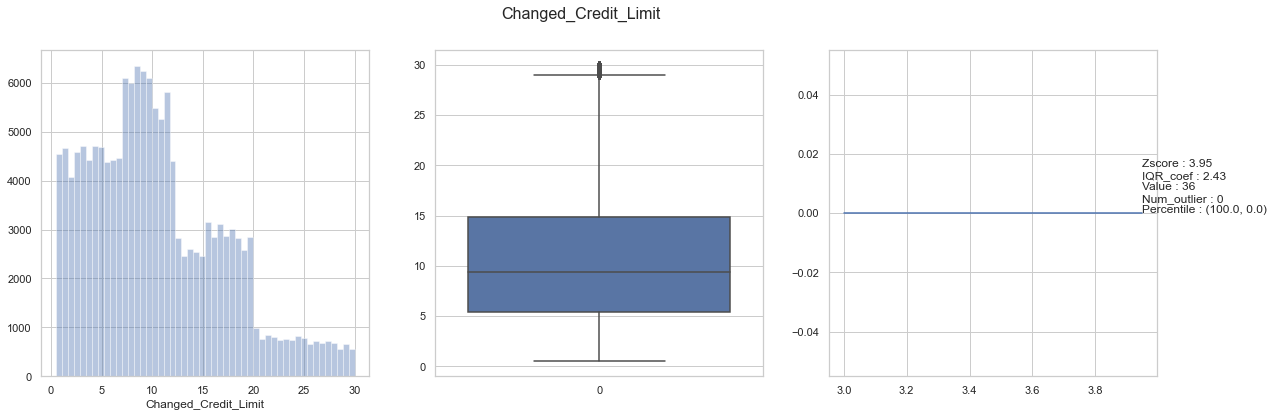

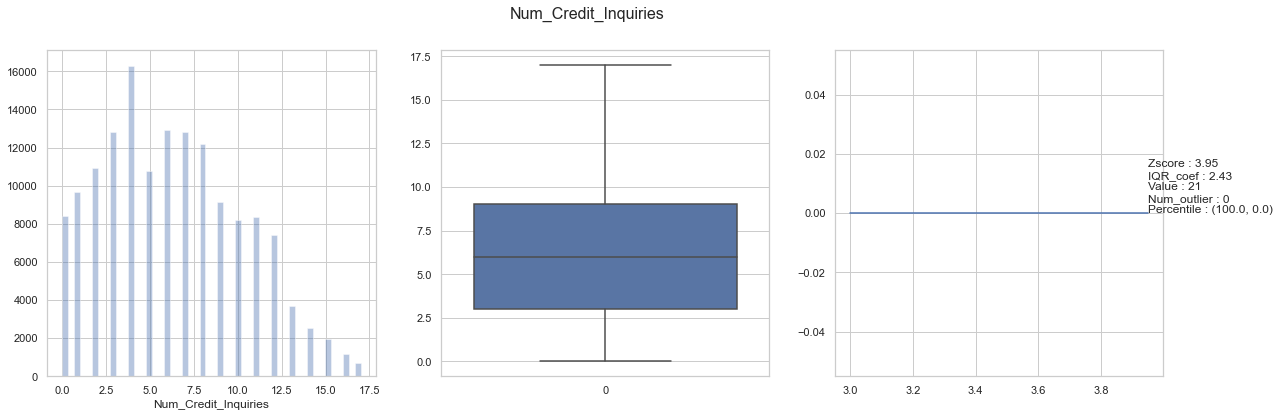

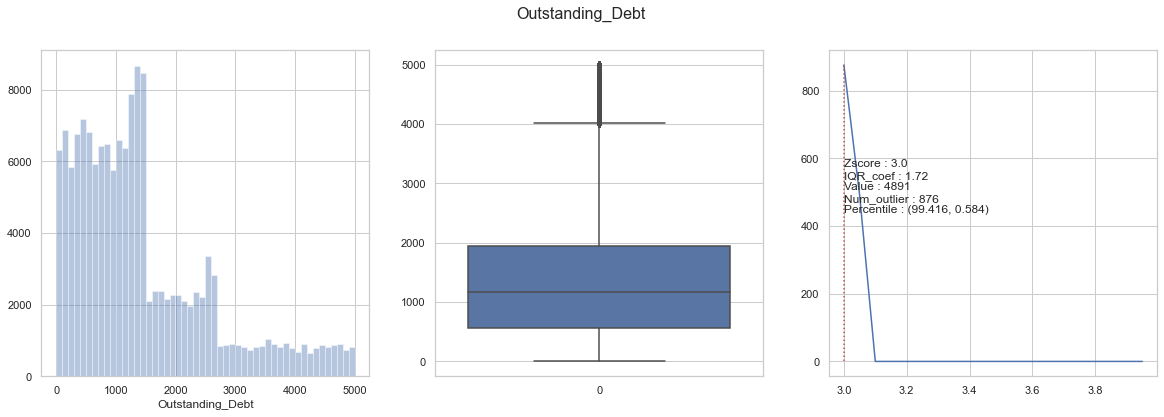

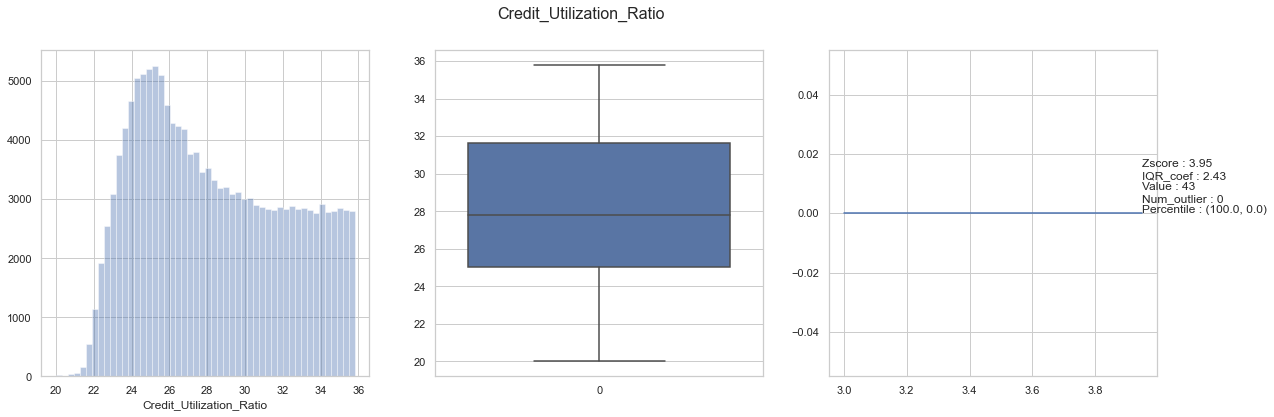

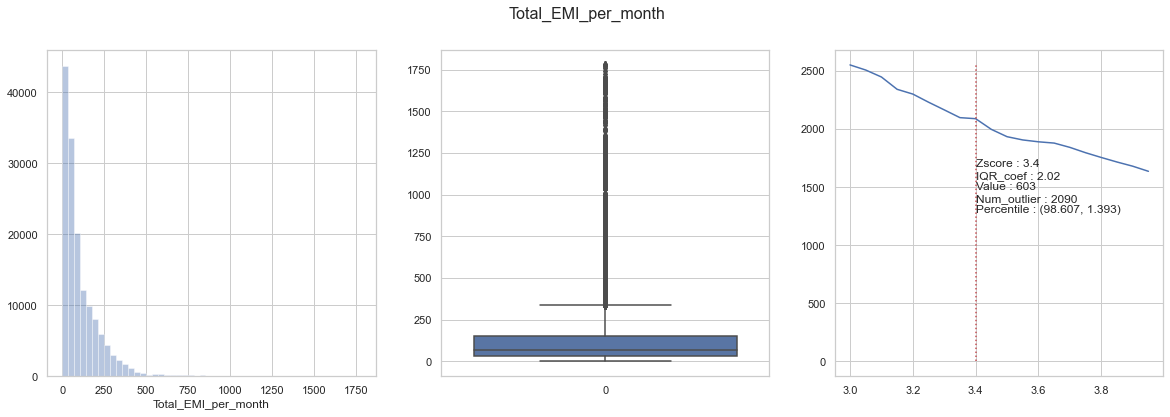

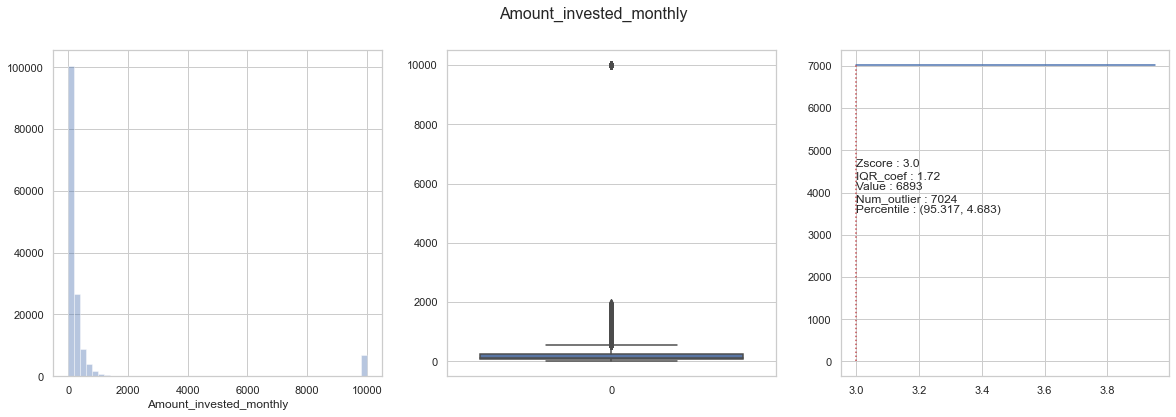

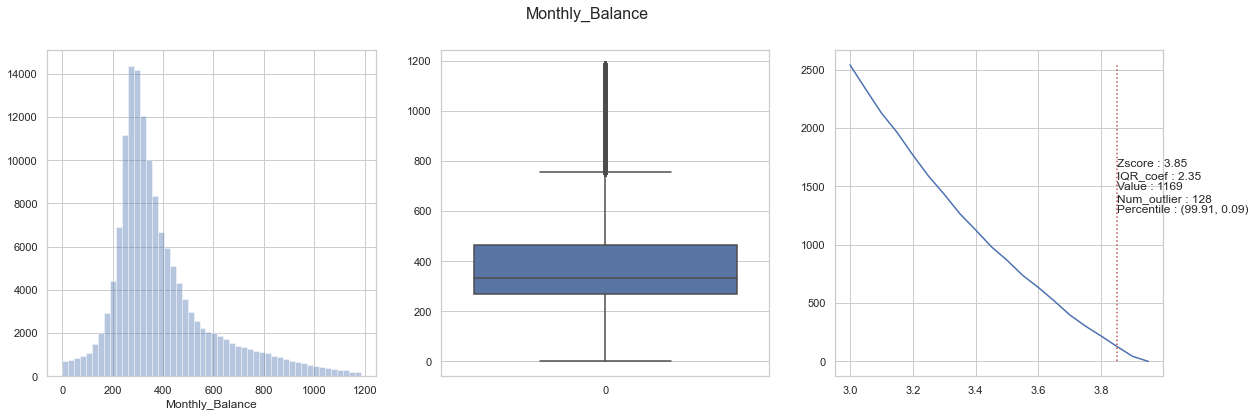

In [109]:
cprint("Outlier Inspection","green","on_red", attrs=["bold"])
for col in df.select_dtypes(include='float').columns[:30]:
    outlier_inspect(df.select_dtypes(include='float'), col)

# Save clean data

In [ ]:
df.to_csv('credit_score_clean_data.csv', index=False)